# HW 3 Part 2 - Tim Demetriades
## Understanding the Logistic Regression Approach
March 5th, 2021

### Task 1

In [1]:
import pandas as pd                 # for dataframes
import numpy as np                  # for arrays 
import matplotlib.pyplot as plt     # for plots
from sklearn import metrics         # for regression/roc
from sklearn.linear_model import LogisticRegression    # for regression model

In [2]:
# Read data
df = pd.read_csv('EE627A_HW3_DataSet1.csv', header=None)
# Display first 5 values
df.head()

,0,1,2,3,4,5,6,7,8,9,...,467,468,469,470,471,472,473,474,475,476
0,5.5986,5.5986,5.5340,5.5340,289.37,289.82,289.30,289.66,289.37,289.82,...,21.206,41.042,42.338,41.042,42.108,2.1330,2.1744,2.1175,2.1175,1
1,5.5340,5.5521,5.5108,5.5185,289.64,289.89,289.63,289.76,289.64,289.89,...,21.258,42.108,42.108,41.881,42.033,2.1175,2.1227,2.1175,2.1175,1
2,5.5185,5.5185,5.4566,5.4772,289.86,290.07,289.65,289.93,289.86,290.07,...,21.268,42.033,42.261,41.804,41.881,2.1227,2.1227,2.1124,2.1124,1
3,5.4772,5.4772,5.3894,5.3894,289.93,290.13,289.63,289.86,289.93,290.13,...,21.310,42.033,42.186,42.033,42.108,2.1227,2.1227,2.0995,2.0995,1
4,5.3894,5.4152,5.3868,5.4152,289.85,290.03,289.45,289.51,289.85,290.03,...,21.310,42.108,42.186,42.033,42.108,2.0995,2.0995,2.0943,2.0995,0


In [3]:
# Split data by predictor and response
predictor = df.iloc[:, 0:476]    # all rows and all columns except the last
response = df[476]               # just the last column (the 1s and 0s)

In [4]:
# Instantiate (create an instance of) the model (using the default parameters)
logreg = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
# Fit the model with the data
logreg.fit(predictor, response)
# Predict the probability
y_pred_prob = logreg.predict_proba(predictor)[::, 1]    # this holds the probabilites for each row

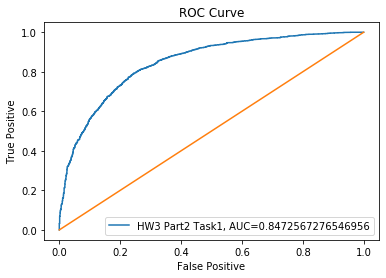

In [5]:
fpr, tpr, _ = metrics.roc_curve(response, y_pred_prob)
auc = metrics.roc_auc_score(response, y_pred_prob)
plt.plot(fpr, tpr, label='HW3 Part2 Task1, AUC='+str(auc))
plt.legend(loc=4)

# For drawing a diagonal line y=x for reference
x = [0, 1]
y = [0, 1]
plt.plot(x, y)

plt.title("ROC Curve")
plt.xlabel("False Positive")
plt.ylabel("True Positive")

plt.show()

### Task 2

In [6]:
predictor_train = df.iloc[0:3000, 0:476]    # first 3000 rows and all columns except last
predictor_test = df.iloc[3000:, 0:476]      # last 3000 rows and all columns except last
response_train = df.iloc[0:3000, 476]       # first 3000 rows and last column
response_test = df.iloc[3000:, 476]         # last 3000 rows and last column

In [7]:
# Instantiate (create an instance of) the model (using the default parameters)
logreg_train = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
# Fit the model with the data
logreg_train.fit(predictor_train, response_train)
# Predict the probability
y_pred_prob_train = logreg_train.predict_proba(predictor_train)[::, 1]    # this holds the probabilites for each training row
y_pred_prob_test = logreg_train.predict_proba(predictor_test)[::, 1]      # using same model get probabilities for each test row

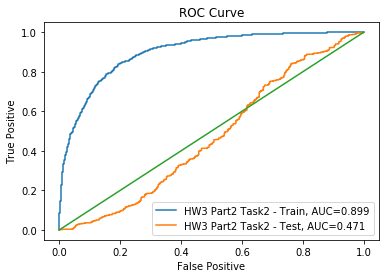

In [8]:
fpr_train, tpr_train, _ = metrics.roc_curve(response_train, y_pred_prob_train)
fpr_test, tpr_test, _ = metrics.roc_curve(response_test, y_pred_prob_test)
auc_train = round(metrics.roc_auc_score(response_train, y_pred_prob_train), 3)
auc_test = round(metrics.roc_auc_score(response_test, y_pred_prob_test), 3)
plt.plot(fpr_train, tpr_train, label='HW3 Part2 Task2 - Train, AUC='+str(auc_train))
plt.plot(fpr_test, tpr_test, label='HW3 Part2 Task2 - Test, AUC='+str(auc_test))
plt.legend(loc=4)

# For drawing a diagonal line y=x for reference
x = [0, 1]
y = [0, 1]
plt.plot(x, y)

plt.title("ROC Curve")
plt.xlabel("False Positive")
plt.ylabel("True Positive")

plt.show()

In [9]:
auc_dif = auc_train - auc_test
print(f'Difference is auc values is {round(auc_dif, 3)}')

Difference is auc values is 0.428


From the above, we can see that this model is not very good, as the difference in AUC is quite large and the ROC graph for the test data is mostly under the y=x reference line. 